### Let's fit a logistic regression with the solver set to lbfgs.

In [4]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a simple model
from sklearn.linear_model import LogisticRegression

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

In [8]:
# Loading in the data and taking a look
df_train = pd.read_csv('train_dataframe.csv')
df_test = pd.read_csv('test_dataframe.csv')

df_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,1.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [9]:
df_test.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,Reviewer_Score
0,2288.0,8.1,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,61.0,9.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,974.0,9.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,838.0,8.4,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,879.0,8.8,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
#Checking the shapes of the data set
df_test.shape

(3413, 2587)

In [11]:
df_train.shape

(13651, 2587)

In [12]:
#Checking the size of the split
3413/13651*100

25.00183136766537

In [13]:
# Checking for imbalance in the dependant variable
df_train['Reviewer_Score'].value_counts()

1.0    7933
0.0    5718
Name: Reviewer_Score, dtype: int64

In [14]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [15]:
#Checking to see if the splits worked
y_train.head(10)

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name: Reviewer_Score, dtype: float64

In [16]:
X_train.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,...,p_worked,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy
0,220.0,9.1,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,1190.0,7.5,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0
2,299.0,8.3,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,87.0,9.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,317.0,7.6,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [17]:
#Checking the shapes before trying to fit any models
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13651, 2586)
(3413, 2586)
(13651,)
(3413,)


In [18]:
# Fitting an unscaled model and scoring it on the test set

# Instantiate 
logreg1 = LogisticRegression(solver='lbfgs')

# Fit
logreg1.fit(X_train, y_train)


# Score on training data
print(logreg1.score(X_train, y_train))

# Score on testing data
print(logreg1.score(X_test, y_test))

0.7229506995824482
0.7213595077644301


In [19]:
# Trying a Standard Scaler as is general practice

# Instantiate
ss = StandardScaler()
# Fit - ONLY ON THE TRAIN SET
ss.fit(X_train, y_train)
# Transform
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# Instantiate 
logreg2 = LogisticRegression(solver='lbfgs')

# Fit
logreg2.fit(X_train_scaled, y_train)

# Score on training data
print(logreg2.score(X_train_scaled, y_train))

# Score on testing data
print(logreg2.score(X_test_scaled, y_test))

0.866676433960882
0.7497802519777322


In [21]:
# Making predictions
y_pred1 = logreg2.predict(X_test)

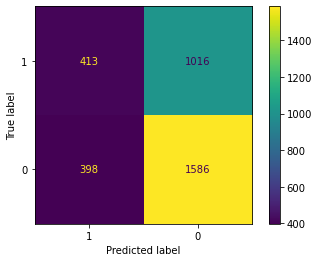

In [22]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_test1 = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(conf_matrix_test1, display_labels=[1,0]).plot()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.51      0.29      0.37      1429
         1.0       0.61      0.80      0.69      1984

    accuracy                           0.59      3413
   macro avg       0.56      0.54      0.53      3413
weighted avg       0.57      0.59      0.56      3413



With the Standard Scaler, the logistic regression model performs a lot better but we can still see some overifitting to the training data. This model seems to capture the positive class really well (High Recall) however on the flipside, it is really bad at capturing the negative class.

### Lets find the 20 words most predictive of a good review (from the positive review column) and 20 words most predictive with a bad review (from the negative review column).

In [24]:
# Pulling out the Coefficients
coefficients = logreg2.coef_
coefficients

array([[-0.01133512,  0.41712753, -0.08882085, ...,  0.03822854,
         0.07474149,  0.0529678 ]])

In [25]:
# Sorting the Coefficients
indices = coefficients.argsort()[0]

In [26]:
# Pulling out the top 20 column names most predictive of a negative review

np.array(X_train.columns.values)[indices[:20]]

array(['n_black', 'n_premier', 'n_joke', 'n_lamp', 'n_room', 'n_staff',
       'n_peeling', 'n_dirty', 'n_rude', 'n_won',
       'Hotel_Name_Thistle Hyde Park', 'n_negative', 'p_wi', 'p_board',
       'n_star', 'n_impression', 'n_smelly', 'n_bed', 'n_deluxe',
       'n_dated'], dtype=object)

In [27]:
# Pulling out the top 20 column names most predictive of a positive review
np.array(X_train.columns.values)[indices[-20:]]

array(['p_outstanding', 'p_attention', 'p_beautiful', 'n_feet', 'p_smile',
       'p_perfect', 'p_upgraded', 'p_fantastic', 'p_ironing',
       'Hotel_Name_Corinthia Hotel London', 'p_future', 'p_half',
       'n_loved', 'p_professional', 'p_movies', 'p_excellent',
       'p_amazing', 'p_kindly', 'p_truly', 'Average_Score'], dtype=object)

This worked well however, there are some columns that are indicative of a positive review that show up in the negative column and 'Average Score' seems to be predictive of the positive reviews as well. Lets ONLY pull out the column names that are from the positive reviews(start with p_) and the same for the negative reviews(starts with n_).

In [28]:
#Creating a DataFrame with the column names and the coefficients

model_coeffs = pd.DataFrame(coefficients, columns = X_train.columns).transpose().reset_index()

In [29]:
model_coeffs

,index,0
0,Additional_Number_of_Scoring,-0.011335
1,Average_Score,0.417128
2,Review_Total_Negative_Word_Counts,-0.088821
3,Total_Number_of_Reviews,-0.016027
4,Review_Total_Positive_Word_Counts,0.102169
...,...,...
2581,p_year,0.094706
2582,p_years,0.084629
2583,p_yes,0.038229
2584,p_young,0.074741


In [30]:
# Rename the index and 0 column
model_coeffs.rename(columns = {'index':'Column_Names', 0 : 'Coefficients'})

,Column_Names,Coefficients
0,Additional_Number_of_Scoring,-0.011335
1,Average_Score,0.417128
2,Review_Total_Negative_Word_Counts,-0.088821
3,Total_Number_of_Reviews,-0.016027
4,Review_Total_Positive_Word_Counts,0.102169
...,...,...
2581,p_year,0.094706
2582,p_years,0.084629
2583,p_yes,0.038229
2584,p_young,0.074741


In [31]:
# Pulling out the negative words with the highest coefficients from the negative reviews (n_)
neg_words = model_coeffs[model_coeffs.iloc[:,0].str.contains('n_')].sort_values(by=0, ascending = False)

In [32]:
neg_words.head(20)

,index,0
1078,n_loved,0.266326
856,n_feet,0.225242
1228,n_perfect,0.207824
479,n_apologetic,0.201833
607,n_changing,0.139724
850,n_fault,0.138449
1037,n_leave,0.135383
473,n_anniversary,0.124838
834,n_eye,0.124420
418,n_16,0.121306


In [33]:
# Pulling out the positive words with the highest coefficients from the positive reviews (p_)
pos_words = model_coeffs[model_coeffs.iloc[:,0].str.contains('p_')].sort_values(by=0, ascending = False)

In [34]:
pos_words.head(20)

,index,0
2511,p_truly,0.362584
2114,p_kindly,0.329085
1719,p_amazing,0.310931
1955,p_excellent,0.292555
2213,p_movies,0.282158
2308,p_professional,0.276714
2046,p_half,0.266018
2016,p_future,0.264394
2099,p_ironing,0.238970
1978,p_fantastic,0.238240


### D. Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

In [35]:
X_train_scaled.shape

(13651, 2586)

In [36]:
# First lets look at the explained variance for all principle components
my_pca1 = PCA(n_components= 2586)
my_pca1.fit(X_train_scaled)

# transform data 
X_train_scaledPCA = my_pca1.transform(X_train_scaled)
X_test_scaledPCA = my_pca1.transform(X_test_scaled)

In [37]:
# Getting the cumulative sum of the explained variance ratio
expl_var = my_pca1.explained_variance_ratio_.cumsum()
print(expl_var)

[0.00249712 0.00431794 0.0059309  ... 1.         1.         1.        ]


In [38]:
expl_var.shape

(2586,)

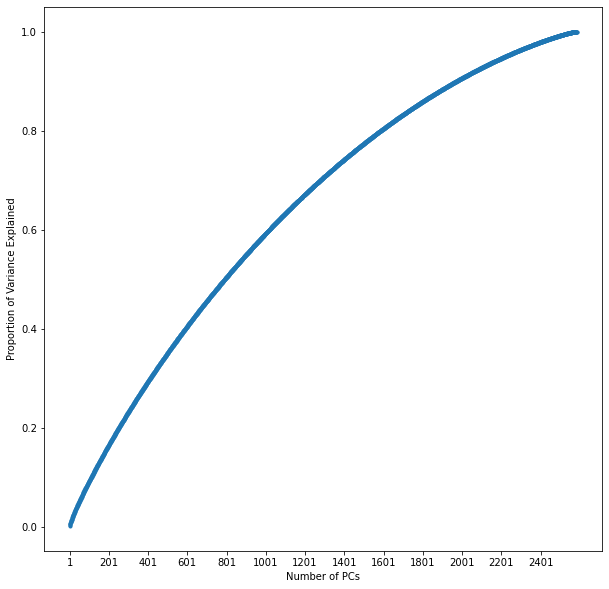

In [39]:
# Plotting the proportion of the variance explained by number of components
plt.figure(figsize=(10,10))
plt.plot(range(1,2587),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,2586,200))
plt.show()

Unfortunately, there is no obvious elbow where the proportion of the variance explained flattens. This means that most of the features are contributing to the variance in the data. Let's see how many features we lose as we reduce the proportion of the variance explained.

In [40]:
reduced_dim_100 = np.where(expl_var < 1)
reduced_dim_100

(array([   0,    1,    2, ..., 2576, 2577, 2578], dtype=int64),)

In [41]:
reduced_dim_95 = np.where(expl_var < 0.95)
reduced_dim_95

(array([   0,    1,    2, ..., 2215, 2216, 2217], dtype=int64),)

In [42]:
reduced_dim_90 = np.where(expl_var < 0.9)
reduced_dim_90

(array([   0,    1,    2, ..., 1967, 1968, 1969], dtype=int64),)

From the above cells we can see that all of the variance is captured in 2,578 of the 2586 principle components. 95% of the variance is captured by 2,217 PC's and 90% of the variance is explained by 1,969 PC's.

Note: Since there are almost 2,600 PC's we will pass a float value into the n_components parameter which will automatically capture the amount of PC's needed to capture the % of the variance. Ex. n_components = .5 is equivalent to capturing the number of components required to capture 50% of the Variance.

In [43]:
import timeit

In [44]:
# Running a loop and getting the run time of the logistic regression
test_scores_logreg = []
train_scores_logreg = []
time_logreg = []

n_comp_pct = np.array([.25, .5, .75, .9, .95, .99])


for n in n_comp_pct:
    my_pca = PCA(n_components=n)
    my_pca.fit(X_train_scaled)
    
    #Transform the data
    X_train_scaledPCA = my_pca.transform(X_train_scaled)
    X_test_scaledPCA = my_pca.transform(X_test_scaled)
    
    start_time = timeit.default_timer()
    #Fit
    my_logreg = LogisticRegression(n_jobs=-1)
    my_logreg.fit(X_train_scaledPCA, y_train)
    
    end_time = timeit.default_timer()
    

    # append score for training set
    train_scores_logreg.append(my_logreg.score(X_train_scaledPCA, y_train))
    # append score for test set
    test_scores_logreg.append(my_logreg.score(X_test_scaledPCA, y_test))
    # append time taken
    time_logreg.append(end_time - start_time)
    

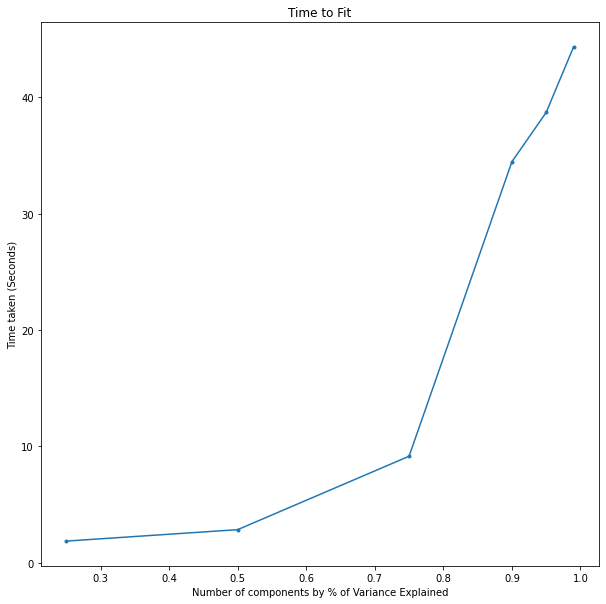

In [45]:
plt.figure(figsize=(10,10))
plt.plot(n_comp_pct,time_logreg,marker='.')
plt.xlabel('Number of components by % of Variance Explained')
plt.ylabel('Time taken (Seconds)')
plt.title('Time to Fit')
plt.show()

In [46]:
DimensionReduction = pd.DataFrame({'n_comp_pct' : n_comp_pct,
                                'Train Scores' : train_scores_logreg,
                                'Test Scores' : test_scores_logreg }, 
                                )
DimensionReduction

,n_comp_pct,Train Scores,Test Scores
0,0.25,0.800088,0.783182
1,0.50,0.815032,0.778787
2,0.75,0.836202,0.774099
3,0.90,0.850707,0.762086
4,0.95,0.860743,0.758570
5,0.99,0.863893,0.753296


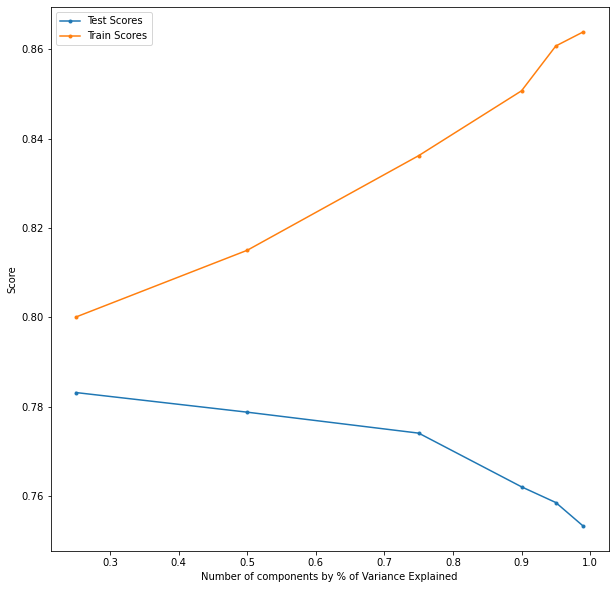

In [47]:
plt.figure(figsize=(10,10))
plt.plot(n_comp_pct, test_scores_logreg, label='Test Scores', marker='.')
plt.plot(n_comp_pct, train_scores_logreg, label='Train Scores', marker='.')
plt.xlabel('Number of components by % of Variance Explained')
plt.ylabel('Score')
plt.legend()
plt.show()

As you can see from the above plots, one great advantage of dimensionality reduction is that the models dont overfit to the data the more you reduce dimensions. As we capture more and more of the variance the training set is clearly overfitting. Also, as seen in the 'Time to fit" graph, the more dimensions you reduce the less expensive the computational time.
Another advantage for PCA is that it can be used to mitigate multicollinearity in the data. 
The obvious disadvantage then, naturally, is that the more dimensions you reduce, the lesser your model is learning from the remaining uncaptured variance in the data.

### Lets fit a KNN model to this data. 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Instantiate
my_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Fit
my_knn.fit(X_train_scaled, y_train)
# Score
print(my_knn.score(X_train_scaled, y_train))
print(my_knn.score(X_test_scaled, y_test))

0.7173833418797158
0.6208614122472897


The accuracy score on the test set is 62%.

In [50]:
# Making predictions for evaluating model
y_pred2 = my_knn.predict(X_test_scaled)

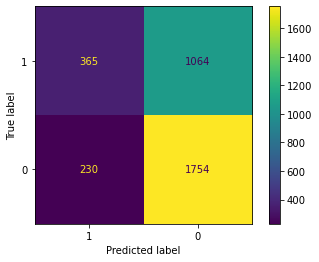

In [51]:
# Confusion Matrix for analysis
conf_matrix_test2 = confusion_matrix(y_test, y_pred2)
ConfusionMatrixDisplay(conf_matrix_test2, display_labels=[1,0]).plot()

In [52]:
# Printing a Classification Report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.61      0.26      0.36      1429
         1.0       0.62      0.88      0.73      1984

    accuracy                           0.62      3413
   macro avg       0.62      0.57      0.55      3413
weighted avg       0.62      0.62      0.58      3413



This KNN model is VERY good at capturing all of our positive class however performs terribly in capturing our negative class.

### KNN is a computationally expensive model. Let's reduce the number of observations (data points) in the dataset. 

In [53]:
# Trying different split sizes to see the runtime
sample_sizes = np.array([.1, .25, .5, .75])
train_accuracy_knn = []
test_accuracy_knn = []
time_knn = []

#for loop to try different sample sizes and assess runtime
for i in sample_sizes:
    
    # Splitting the data according to sample size (i)
    X_trainknn = X_train.sample(frac=i, random_state = 3)
    indexestrain = X_trainknn.index # Maintaining the indexes from the X_trainknn to apply to y_train
    X_testknn = X_test.sample(frac=i, random_state = 3)
    indexestest = X_testknn.index # Maintaining the indexes from the X_testknn to apply to y_test
    y_trainknn = y_train[indexestrain]
    y_testknn = y_test[indexestest]
    
    # Scaling
    ss.fit(X_trainknn, y_trainknn)
    # Transform
    X_train_scaledknn = ss.transform(X_trainknn)
    X_test_scaledknn = ss.transform(X_testknn)
    
    #instantiate
    my_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    
    start_time = timeit.default_timer() # start timer
    
    #fit
    my_knn.fit(X_train_scaledknn, y_trainknn)
    
    #evaluate and append scores for test and train set
    train_acc = my_knn.score(X_train_scaledknn, y_trainknn)
    test_acc = my_knn.score(X_test_scaledknn, y_testknn)
    
    end_time = timeit.default_timer() # end timer
    
    train_accuracy_knn.append(train_acc)
    test_accuracy_knn.append(test_acc)
    # append time taken
    time_knn.append(end_time - start_time)

### Let's look at relationship between the number of observations and run-time for KNN.

In [54]:
minutes_knn = []
for number in time_knn:
    minutes_knn.append(number / 60)

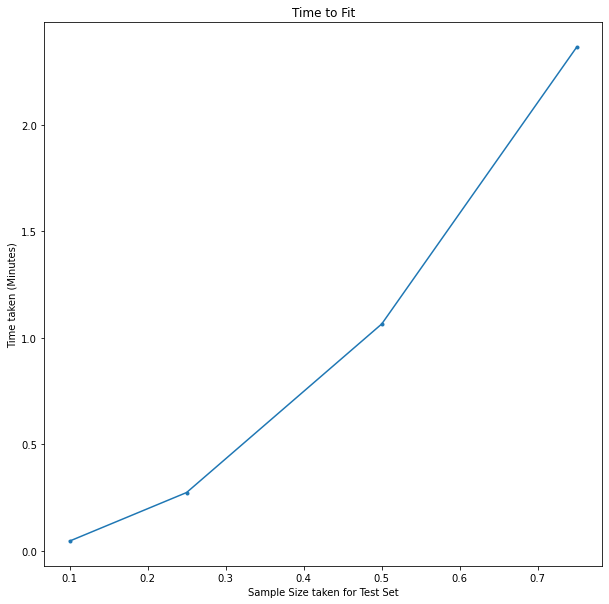

In [55]:
# Plotting the time it took to fit
plt.figure(figsize=(10,10))
plt.plot(sample_sizes,minutes_knn,marker='.')
plt.xlabel('Sample Size taken for Test Set')
plt.ylabel('Time taken (Minutes)')
plt.title('Time to Fit')
plt.show()

In [56]:
KNN_Scores = pd.DataFrame({'Sample Sizes' : sample_sizes,
                                'Train Scores' : train_accuracy_knn,
                                'Test Scores' : test_accuracy_knn, 'Time Taken to Fit (Minutes)' : minutes_knn }, 
                                )
KNN_Scores

,Sample Sizes,Train Scores,Test Scores,Time Taken to Fit (Minutes)
0,0.10,0.723077,0.586510,0.046733
1,0.25,0.632288,0.595545,0.274544
2,0.50,0.717844,0.600234,1.064884
3,0.75,0.728658,0.623828,2.364199


Clearly, the larger the number of observations, the slower the run time. This is because for a single classification of a data point 𝑎, we need to find the 𝐾(in our case, 5) neighbors closest to  𝑎 , which requires calculating the distance between  𝑎  and every single point in the training set. 

The one major advantage is the one realized above where run-time is significantly reduced and therefore less expensive computationally the more observations you reduce.
The disadvantage to this is the obvious data loss which will ultimately reduce the complexity of the model. Also, if you reduce the number of observations by a lot for ex. less rows than columns, then the model will naturally overfit to the smaller number of observations and perform poorly on the test set as can be observed in the Dataframe above.

### Let's use the dataset to find an optimal value for K in the KNN algorithm. 

In [57]:
# Splitting the data into train and validation sets
X_tr1, X_val1, y_tr1, y_val1 = \
    train_test_split(X_train_scaled, y_train, test_size = 0.3,
                     random_state=1)

In [58]:
# Running a loop to try different k_values

val_scoresknn = []
tr_scoresknn = []

K_Neighbours = np.arange(1, 20 , 1)

# linear search over the hyper parameter space
for k in K_Neighbours:
    
    my_knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    my_knn.fit(X_tr1, y_tr1)

    # Score on the train set and append this accuracy to its respective list
    tr_scoresknn.append(my_knn.score(X_tr1, y_tr1))
    # Score on the validation set and append this accuracy to its respective list
    val_scoresknn.append(my_knn.score(X_val1, y_val1))

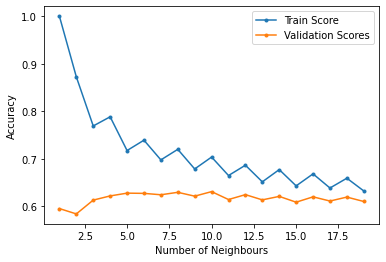

In [59]:
# Plotting the accuracies against the k values
plt.figure()
plt.plot(K_Neighbours, tr_scoresknn,label="Train Score",marker='.')
plt.plot(K_Neighbours, val_scoresknn,label="Validation Scores",marker='.')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [60]:
Kno = pd.DataFrame({'Number of Neighbours' : K_Neighbours,
                                'Train Scores' : tr_scoresknn,
                                'Validation Scores' : val_scoresknn}, 
                                )
Kno

,Number of Neighbours,Train Scores,Validation Scores
0,1,1.000000,0.595459
1,2,0.872527,0.584229
2,3,0.769231,0.613281
3,4,0.788488,0.622070
4,5,0.717530,0.627930
5,6,0.739299,0.627441
6,7,0.697855,0.624512
7,8,0.720042,0.629639
8,9,0.678807,0.621582
9,10,0.703820,0.631104


It seems as if the best K_Neighbours values that gives the highest test percentages are 10 (63.1% Test Score) and 8 (62.9% Test Score). We will choose the K value of 8 in this instance as the model is overfitting lesser with a k value of 8 rather than 10.

In [62]:
# Running our model with the optimal K value of 8
# Instantiate
my_knn2 = KNeighborsClassifier(n_neighbors=8)
# Fit
my_knn2.fit(X_train_scaled, y_train)
# Score
print(my_knn.score(X_train_scaled, y_train))
print(my_knn.score(X_test_scaled, y_test))

0.6258882133177056
0.5977146205684148


              precision    recall  f1-score   support

         0.0       0.61      0.30      0.40      1429
         1.0       0.63      0.86      0.73      1984

    accuracy                           0.63      3413
   macro avg       0.62      0.58      0.57      3413
weighted avg       0.62      0.63      0.59      3413



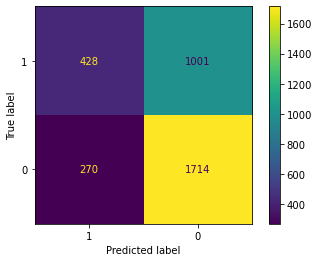

In [63]:
# Making predictions for evaluating model
y_pred3 = my_knn2.predict(X_test_scaled)

# Confusion Matrix for analysis
conf_matrix_test3 = confusion_matrix(y_test, y_pred3)
ConfusionMatrixDisplay(conf_matrix_test3, display_labels=[1,0]).plot()

# Printing a Classification Report
print(classification_report(y_test, y_pred3))

### Let's fit a decision tree model to this data. 

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Instantiate
D_tree = DecisionTreeClassifier(max_depth=3)

# Fit
D_tree.fit(X_train, y_train); # Note that we are not fitting to scaled data as Decision trees do not need scaled data to perform well

# Score
test_acc = D_tree.score(X_test, y_test)
train_acc = D_tree.score(X_train, y_train)              

print(f"Train accuracy: {train_acc} | Test accuracy: {test_acc}")

Train accuracy: 0.7206065489707714 | Test accuracy: 0.7251684734837387


In [47]:
# Making predictions for evaluating model
y_pred4 = D_tree.predict(X_test)

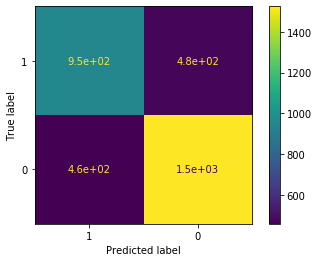

In [48]:
# Confusion Matrix for analysis
conf_matrix_test4 = confusion_matrix(y_test, y_pred4)
ConfusionMatrixDisplay(conf_matrix_test4, display_labels=[1,0]).plot()

In [49]:
# Printing a Classification Report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      1429
         1.0       0.76      0.77      0.76      1984

    accuracy                           0.73      3413
   macro avg       0.72      0.72      0.72      3413
weighted avg       0.72      0.73      0.72      3413



This model seems to be doing a decent job at capturing the positive class(High Recall) and has a precision of 76% for our positive class and 67% for our negative class.

### Let's use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. 

In [53]:
# split train data set into train and validation
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(X_train, y_train, test_size = 0.3, random_state=1)

In [55]:
# find the optimal maximum depth by comparing the training and validation score

DTval_scores = []
DTtr_scores = []

max_depth_range = np.arange(1, 18)

for d in max_depth_range:
    my_DTree = DecisionTreeClassifier(max_depth = d)
    my_DTree.fit(X_tr2, y_tr2)
   
    # score on traning set
    DTtr_scores.append(my_DTree.score(X_tr2, y_tr2))
    
    # score on validation set
    DTval_scores.append(my_DTree.score(X_val2, y_val2))

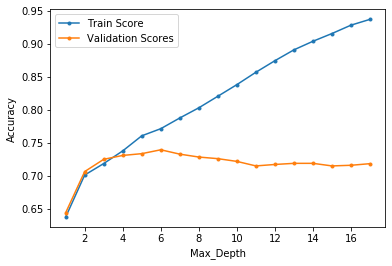

In [56]:
# Plotting the accuracies against the max_depth values
plt.figure()
plt.plot(max_depth_range, DTtr_scores,label="Train Score",marker='.')
plt.plot(max_depth_range, DTval_scores,label="Validation Scores",marker='.')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

It seems as if the Max_Depth of 3 is best as there seems to be the least amount of overfitting and the test accuracy flattens. Luckily, when we first originally ran a decision tree, we chose this value(max_depth=3) so there is no need to do rerun the same thing.

Advantages :

The biggest advantage of Decision tree vs KNN is that the decision tree can handle data by chaining together data points in a hierarchical way. The root of the decision tree is chosen by the high weighting of the attribute. Unlike KNN, it is not a distance-based classifier constrained to learning using distance from one vs all data points and for this reason it is a lot less expensive computationally. 

KNN can be sensitive to a feature's unit scale and requires us to normalize the data before using KNN classifiers. Since decision trees navigates through one feature at a time, normalization is not required. 
Decision trees are easy to interpret and explain to non-technical stakeholders as it is very easy to explain where and how the decisions were made in the model.

Decision trees are not affected by outliers and can deal with a reasonable amount of missing values. 


Shortcomings:

Decision trees tend to be very sensitive to minor changes in data, and can introduce serious biases as you navigate down the tree to lower nodes when you add new data. 

Decisions for DT are made based on the training set hence there is a high chance of overfitting and and therefore lower prediction accuracy than most other models. 


### Let's perform a 5-fold cross validation to optimize the hyperparameters of your model.

In [57]:
# Running a 5-fold CV to optimize our C value
cross_validation_scores = []

C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, .1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c, random_state=1, n_jobs=-1)

    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(
        LR_model, X_train_scaled, y_train, cv=5))

    cross_validation_scores.append(cv_score)

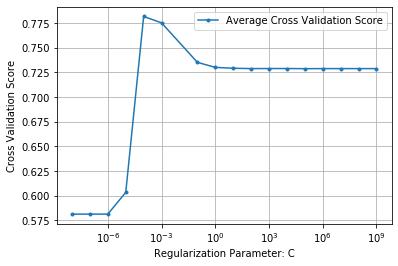

In [58]:
plt.figure()
plt.plot(C_range, cross_validation_scores,
         label="Average Cross Validation Score", marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

Looks like 10^-2 seems to have the best scores. Lets instantiate a model with C=0.01.

In [15]:
# Fit the final Logistic Regression with the optimal C-Value
# Instantiate 
logregfin = LogisticRegression(solver='lbfgs', C=0.01, random_state=1)

# Fit
logregfin.fit(X_train_scaled, y_train)

# Score on training data
print(logregfin.score(X_train_scaled, y_train))

# Score on testing data
print(logregfin.score(X_test_scaled, y_test))

0.8666031792542671
0.757691180779373


In [16]:
# Making predictions for evaluating model
y_pred5 = logregfin.predict(X_test_scaled)

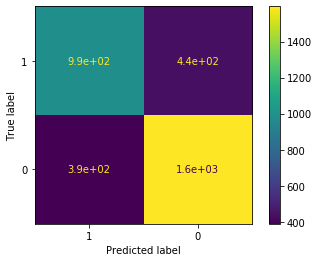

In [17]:
# Confusion Matrix for analysis
conf_matrix_test5 = confusion_matrix(y_test, y_pred5)
ConfusionMatrixDisplay(conf_matrix_test5, display_labels=[1,0]).plot()

In [18]:
# Printing a Classification Report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.72      0.69      0.71      1429
         1.0       0.78      0.80      0.79      1984

    accuracy                           0.76      3413
   macro avg       0.75      0.75      0.75      3413
weighted avg       0.76      0.76      0.76      3413



Great! This is the best classification report we have seen thus far. The model seems to be capturing more of the negative reviews correctly (previously we have only seen a high recall for the positive reviews) and our precision on accurately indentifying the positive and negative reviews is also quite high.

From our first logistic regression model, we saw that Average_Score had a high coefficient value and is top contributer in predicting positive reviews. If we can fine-tune this column we may get improved accuracy. Note: This score is not the same as the Reviewer_Score.

In [19]:
#Taking a look at the Average score column
X_train['Average_Score'].value_counts(ascending=False)

8.7    1234
8.1    1108
8.4     964
8.3     911
8.2     822
8.6     808
8.5     778
8.9     768
8.8     752
7.8     727
9.0     620
9.1     534
8.0     532
7.5     438
9.4     371
7.7     354
7.9     323
7.1     320
9.3     259
9.2     250
7.4     144
7.6     129
7.0     122
7.3     111
6.9      77
6.8      56
6.4      43
6.7      36
9.5      25
6.6      24
9.6      11
Name: Average_Score, dtype: int64

In [20]:
#Checking the Minimum and Maximum scores
print(X_train['Average_Score'].min())
print(X_train['Average_Score'].max())

6.4
9.6


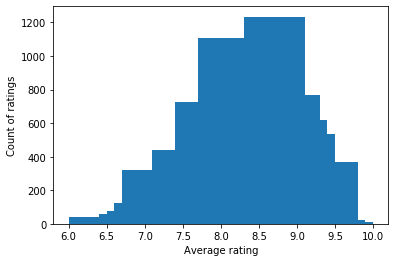

In [21]:
# Checking the distribution
values, counts = np.unique(X_train['Average_Score'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Average rating')
plt.ylabel('Count of ratings')
plt.show()

The distribution tends to be centered around 8.5 so lets remap this column where if the Average Score is less than 8.5 then we assign it a 0 and a 1 if its higher than or equal to 8.5.

In [22]:
# Making Copies of X_train and X_test
X_traincopy = X_train.copy()
X_testcopy = X_test.copy()

In [23]:
# Adding new column with our binary classification
X_traincopy['High_Avg_Score'] = X_traincopy['Average_Score'].apply(lambda x: 1 if x >= 8.5 else 0)

In [24]:
# Check
X_traincopy['High_Avg_Score'].value_counts()

0    7241
1    6410
Name: High_Avg_Score, dtype: int64

In [25]:
# Doing the same with the test set
X_testcopy['High_Avg_Score'] = X_testcopy['Average_Score'].apply(lambda x: 1 if x >= 8.5 else 0)

In [26]:
# Check
X_testcopy['High_Avg_Score'].value_counts()

0    1784
1    1629
Name: High_Avg_Score, dtype: int64

In [27]:
# Lets drop the Average_score columns from both the train and test set since we will no longer be needing it
X_testcopy.drop(['Average_Score'], axis = 1, inplace = True)
X_traincopy.drop(['Average_Score'], axis = 1, inplace = True)

In [28]:
#Check
X_testcopy.head()

,Additional_Number_of_Scoring,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,Review_Day,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,High_Avg_Score
0,2288.0,24.0,9568.0,16.0,1.0,527.0,51.511099,-0.120867,2.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,61.0,0.0,263.0,21.0,1.0,527.0,51.522636,-0.160287,2.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,974.0,20.0,3040.0,20.0,12.0,485.0,51.500732,-0.016550,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,838.0,23.0,3274.0,29.0,5.0,415.0,51.495666,-0.145279,6.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,879.0,48.0,2768.0,51.0,1.0,385.0,51.508354,0.019886,7.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
#Check
X_traincopy.head()

,Additional_Number_of_Scoring,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Month,Review_Day,...,p_working,p_world,p_worth,p_wouldn,p_year,p_years,p_yes,p_young,p_yummy,High_Avg_Score
0,220.0,20.0,902.0,21.0,1.0,275.0,51.494308,-0.175558,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
1,1190.0,5.0,5180.0,23.0,6.0,481.0,51.514879,-0.160650,4.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.425849,0.0,0.0,0.0,0
2,299.0,81.0,1361.0,27.0,4.0,672.0,51.521009,-0.123097,10.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,87.0,17.0,355.0,13.0,7.0,412.0,51.499749,-0.161524,6.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
4,317.0,14.0,1458.0,0.0,1.0,499.0,51.516114,-0.174952,3.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


Let's run the model from earlier and re-optimize the hyperparameters.

In [30]:
#Scaling the new copies
# Fit - ONLY ON THE TRAIN SET
ss.fit(X_traincopy, y_train)
# Transform
Xtr_copyss = ss.transform(X_traincopy)
Xtest_copyss = ss.transform(X_testcopy)

In [ ]:
# Because of run time, we will run a smaller range of C values that performed the best on the prev model

In [32]:
# Running a 5-fold CV to optimize our C value
cross_validation_scores2 = []

C_range2 = np.array([.0001, .001, .1,
                    1, 10])

# Do some cross validation
for c in C_range:
    LR_model2 = LogisticRegression(C=c, random_state=1, n_jobs=-1)

    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(
        LR_model2, Xtr_copyss, y_train, cv=5))

    cross_validation_scores2.append(cv_score)

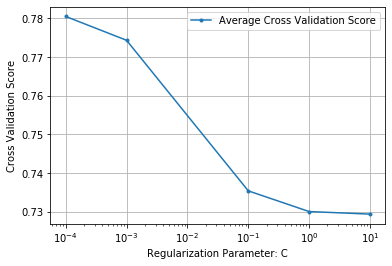

In [33]:
plt.figure()
plt.plot(C_range2, cross_validation_scores2,
         label="Average Cross Validation Score", marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

In [35]:
# Fit the final Logistic Regression with the optimal C-Value
# Instantiate 
logregfin2 = LogisticRegression(solver='lbfgs', C=.0001 , random_state = 1)

# Fit
logregfin2.fit(Xtr_copyss, y_train)

# Score on training data
print(logregfin2.score(Xtr_copyss, y_train))

# Score on testing data
print(logregfin2.score(Xtest_copyss, y_test))

0.8249945058970038
0.7770290067389394


Cool! Our new model with our designed feature performs the best on the test set! The training set is also overfitting less to the training data!